In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv(r'application_train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Handling Duplicate

In [5]:
train.duplicated(subset=['SK_ID_CURR']).sum()

0

## Handling Missing Value

In [6]:
# Cek kolom yang memiliki missing values
missing_values = train.isnull().sum()

# Filter kolom yang memiliki nilai yang hilang
missing_columns = missing_values[missing_values > 0]

# Tampilkan nama-nama kolom yang memiliki missing values
print("Kolom dengan Missing Values:")
print(missing_columns.index)

Kolom dengan Missing Values:
Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI'

### Handling Missing Value Column Group1

In [7]:
# Kolom-kolom yang akan dicek missing values
columns_group1 = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
    'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
    'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
    'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
    'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
    'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'
]

# Iterasi melalui setiap kolom dan cetak jumlah missing values
for column in columns_group1:
    missing_values = train[column].isnull().sum()
    print(f"Missing values in {column}: {missing_values}")


Missing values in NAME_CONTRACT_TYPE: 0
Missing values in CODE_GENDER: 0
Missing values in FLAG_OWN_CAR: 0
Missing values in FLAG_OWN_REALTY: 0
Missing values in CNT_CHILDREN: 0
Missing values in AMT_INCOME_TOTAL: 0
Missing values in AMT_CREDIT: 0
Missing values in AMT_ANNUITY: 12
Missing values in AMT_GOODS_PRICE: 278
Missing values in NAME_TYPE_SUITE: 1292
Missing values in NAME_INCOME_TYPE: 0
Missing values in NAME_EDUCATION_TYPE: 0
Missing values in NAME_FAMILY_STATUS: 0
Missing values in NAME_HOUSING_TYPE: 0
Missing values in REGION_POPULATION_RELATIVE: 0
Missing values in DAYS_BIRTH: 0
Missing values in DAYS_EMPLOYED: 0
Missing values in DAYS_REGISTRATION: 0
Missing values in DAYS_ID_PUBLISH: 0
Missing values in OWN_CAR_AGE: 202929
Missing values in FLAG_MOBIL: 0
Missing values in FLAG_EMP_PHONE: 0
Missing values in FLAG_WORK_PHONE: 0
Missing values in FLAG_CONT_MOBILE: 0
Missing values in FLAG_PHONE: 0
Missing values in FLAG_EMAIL: 0
Missing values in OCCUPATION_TYPE: 96391
Miss

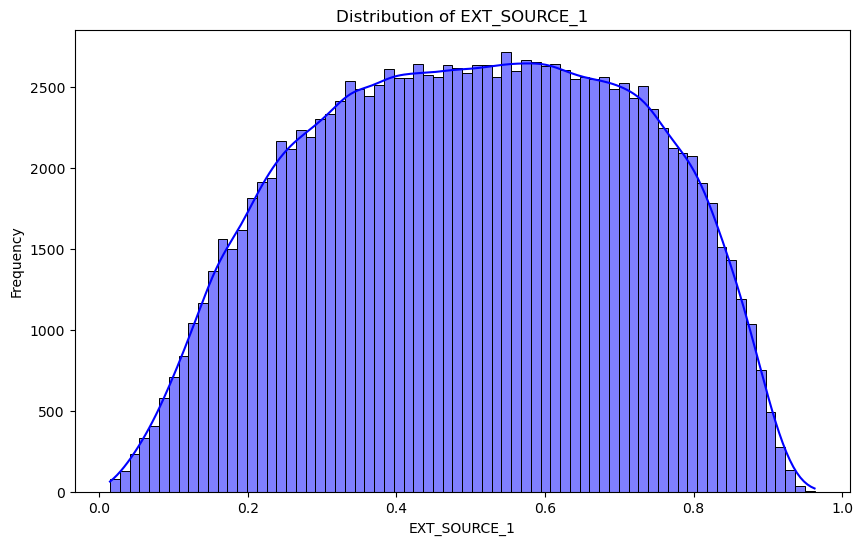

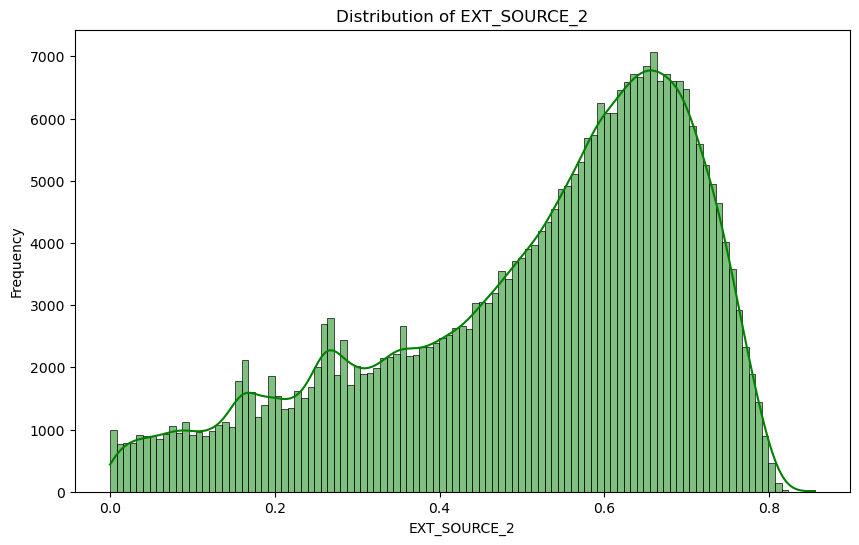

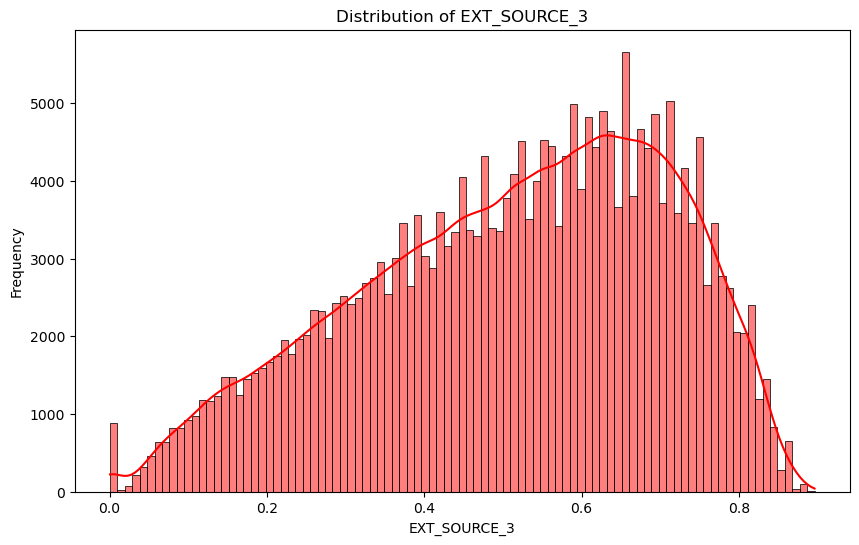

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Memplot histogram untuk EXT_SOURCE_1
plt.figure(figsize=(10, 6))
sns.histplot(train['EXT_SOURCE_1'].dropna(), kde=True, color='blue')
plt.title('Distribution of EXT_SOURCE_1')
plt.xlabel('EXT_SOURCE_1')
plt.ylabel('Frequency')
plt.show()

# Memplot histogram untuk EXT_SOURCE_2
plt.figure(figsize=(10, 6))
sns.histplot(train['EXT_SOURCE_2'].dropna(), kde=True, color='green')
plt.title('Distribution of EXT_SOURCE_2')
plt.xlabel('EXT_SOURCE_2')
plt.ylabel('Frequency')
plt.show()

# Memplot histogram untuk EXT_SOURCE_3
plt.figure(figsize=(10, 6))
sns.histplot(train['EXT_SOURCE_3'].dropna(), kde=True, color='red')
plt.title('Distribution of EXT_SOURCE_3')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('Frequency')
plt.show()


In [9]:
# Mengganti missing value dengan mean untuk EXT_SOURCE_1
mean_EXT_SOURCE_1 = train['EXT_SOURCE_1'].mean()
train['EXT_SOURCE_1'].fillna(mean_EXT_SOURCE_1, inplace=True)

# Mengganti missing value dengan median untuk EXT_SOURCE_2
median_EXT_SOURCE_2 = train['EXT_SOURCE_2'].median()
train['EXT_SOURCE_2'].fillna(median_EXT_SOURCE_2, inplace=True)

# Mengganti missing value dengan median untuk EXT_SOURCE_3
median_EXT_SOURCE_3 = train['EXT_SOURCE_3'].median()
train['EXT_SOURCE_3'].fillna(median_EXT_SOURCE_3, inplace=True)

In [10]:
# Mengisi missing value pada OWN_CAR_AGE
train['OWN_CAR_AGE'] = train.apply(lambda x: 0 if pd.isnull(x['OWN_CAR_AGE']) and x['FLAG_OWN_CAR'] == 'N' else x['OWN_CAR_AGE'], axis=1)

In [11]:
# Mengidentifikasi baris yang memiliki nilai "Pensioner" di kolom "NAME_INCOME_TYPE" dan nilai yang hilang di kolom "OCCUPATION_TYPE"
pensioner_rows = train[(train['NAME_INCOME_TYPE'] == 'Unemployed') & (train['OCCUPATION_TYPE'].isnull())]
# Mengisi nilai yang hilang dengan "Unemployed" untuk baris yang sesuai
train.loc[pensioner_rows.index, 'OCCUPATION_TYPE'] = 'Unemployed'

# Mengidentifikasi baris yang memiliki nilai "Pensioner" di kolom "NAME_INCOME_TYPE" dan nilai yang hilang di kolom "OCCUPATION_TYPE"
pensioner_rows = train[(train['NAME_INCOME_TYPE'] == 'Businessman') & (train['OCCUPATION_TYPE'].isnull())]
# Mengisi nilai yang hilang dengan "Unemployed" untuk baris yang sesuai
train.loc[pensioner_rows.index, 'OCCUPATION_TYPE'] = 'Managers'

# Mengidentifikasi baris yang memiliki nilai "Pensioner" di kolom "NAME_INCOME_TYPE" dan nilai yang hilang di kolom "OCCUPATION_TYPE"
pensioner_rows = train[(train['NAME_INCOME_TYPE'] == 'Maternity leave') & (train['OCCUPATION_TYPE'].isnull())]
# Mengisi nilai yang hilang dengan "Unemployed" untuk baris yang sesuai
train.loc[pensioner_rows.index, 'OCCUPATION_TYPE'] = 'Core staff'

# Mengidentifikasi baris yang memiliki nilai "Pensioner" di kolom "NAME_INCOME_TYPE" dan nilai yang hilang di kolom "OCCUPATION_TYPE"
pensioner_rows = train[(train['NAME_INCOME_TYPE'] == 'Working') & (train['OCCUPATION_TYPE'].isnull())]
# Mengisi nilai yang hilang dengan "Unemployed" untuk baris yang sesuai
train.loc[pensioner_rows.index, 'OCCUPATION_TYPE'] = 'Laborers'

# Mengidentifikasi baris yang memiliki nilai "Pensioner" di kolom "NAME_INCOME_TYPE" dan nilai yang hilang di kolom "OCCUPATION_TYPE"
pensioner_rows = train[(train['NAME_INCOME_TYPE'] == 'Student') & (train['OCCUPATION_TYPE'].isnull())]
# Mengisi nilai yang hilang dengan "Unemployed" untuk baris yang sesuai
train.loc[pensioner_rows.index, 'OCCUPATION_TYPE'] = 'Laborers'

# Mengidentifikasi baris yang memiliki nilai "Pensioner" di kolom "NAME_INCOME_TYPE" dan nilai yang hilang di kolom "OCCUPATION_TYPE"
pensioner_rows = train[(train['NAME_INCOME_TYPE'] == 'Pensioner') & (train['OCCUPATION_TYPE'].isnull())]
# Mengisi nilai yang hilang dengan "Unemployed" untuk baris yang sesuai
train.loc[pensioner_rows.index, 'OCCUPATION_TYPE'] = 'Retired'

# Mengidentifikasi baris yang memiliki nilai "Pensioner" di kolom "NAME_INCOME_TYPE" dan nilai yang hilang di kolom "OCCUPATION_TYPE"
pensioner_rows = train[(train['NAME_INCOME_TYPE'] == 'State servant') & (train['OCCUPATION_TYPE'].isnull())]
# Mengisi nilai yang hilang dengan "Unemployed" untuk baris yang sesuai
train.loc[pensioner_rows.index, 'OCCUPATION_TYPE'] = 'Core staff'

# Mengidentifikasi baris yang memiliki nilai "Pensioner" di kolom "NAME_INCOME_TYPE" dan nilai yang hilang di kolom "OCCUPATION_TYPE"
pensioner_rows = train[(train['NAME_INCOME_TYPE'] == 'Commercial associate') & (train['OCCUPATION_TYPE'].isnull())]
# Mengisi nilai yang hilang dengan "Unemployed" untuk baris yang sesuai
train.loc[pensioner_rows.index, 'OCCUPATION_TYPE'] = 'Laborers'

### Handling Missing Value Column Group2

In [12]:
columns_group2 = ['APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',]

# Menghitung jumlah missing values pada kolom-kolom yang dipilih
missing_values = train[columns_group2].isnull().sum()

# Menampilkan jumlah missing values pada kolom-kolom yang dipilih
print(missing_values)


APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE                 214865
ELEVATORS_MODE                  163891
ENTRANCES_MODE                  154828
FLOORSMAX_MODE                  153020
FLOORSMIN_MODE                  208642
LANDAREA_MODE                   182590
LIVINGAPARTMENTS_MODE           210199
LIVINGAREA_MODE          

In [13]:
train.drop(columns=columns_group2, inplace=True)

### Handling Missing Value Column Group3

In [14]:
# Kolom-kolom yang akan dicek missing values
columns_group3 = [
    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]

# Iterasi melalui setiap kolom dan cetak jumlah missing values
for column in columns_group3:
    missing_values = train[column].isnull().sum()
    print(f"Missing values in {column}: {missing_values}")


Missing values in OBS_30_CNT_SOCIAL_CIRCLE: 1021
Missing values in DEF_30_CNT_SOCIAL_CIRCLE: 1021
Missing values in OBS_60_CNT_SOCIAL_CIRCLE: 1021
Missing values in DEF_60_CNT_SOCIAL_CIRCLE: 1021
Missing values in DAYS_LAST_PHONE_CHANGE: 1
Missing values in FLAG_DOCUMENT_2: 0
Missing values in FLAG_DOCUMENT_3: 0
Missing values in FLAG_DOCUMENT_4: 0
Missing values in FLAG_DOCUMENT_5: 0
Missing values in FLAG_DOCUMENT_6: 0
Missing values in FLAG_DOCUMENT_7: 0
Missing values in FLAG_DOCUMENT_8: 0
Missing values in FLAG_DOCUMENT_9: 0
Missing values in FLAG_DOCUMENT_10: 0
Missing values in FLAG_DOCUMENT_11: 0
Missing values in FLAG_DOCUMENT_12: 0
Missing values in FLAG_DOCUMENT_13: 0
Missing values in FLAG_DOCUMENT_14: 0
Missing values in FLAG_DOCUMENT_15: 0
Missing values in FLAG_DOCUMENT_16: 0
Missing values in FLAG_DOCUMENT_17: 0
Missing values in FLAG_DOCUMENT_18: 0
Missing values in FLAG_DOCUMENT_19: 0
Missing values in FLAG_DOCUMENT_20: 0
Missing values in FLAG_DOCUMENT_21: 0
Missing 

In [15]:
# Mengisi nilai yang hilang dengan nol
train['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0, inplace=True)
train['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0, inplace=True)
train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0, inplace=True)
train['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0, inplace=True)
train['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0, inplace=True)
train['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0, inplace=True)

### Cek missing value

In [16]:
missing_values = train.isnull().sum()

# Filter kolom yang memiliki nilai yang hilang
missing_columns = missing_values[missing_values > 0]

# Tampilkan nama-nama kolom yang memiliki missing values
print("Kolom dengan Missing Values:")
print(missing_columns.index)


Kolom dengan Missing Values:
Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')


In [17]:
# Drop baris dengan nilai yang hilang dalam kolom-kolom yang disebutkan
cleaned_data = train.dropna(subset=missing_columns.index)
cleaned_data.shape

(305183, 75)

## Handling Outlier

In [18]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305183 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   305183 non-null  int64  
 1   TARGET                       305183 non-null  int64  
 2   NAME_CONTRACT_TYPE           305183 non-null  object 
 3   CODE_GENDER                  305183 non-null  object 
 4   FLAG_OWN_CAR                 305183 non-null  object 
 5   FLAG_OWN_REALTY              305183 non-null  object 
 6   CNT_CHILDREN                 305183 non-null  int64  
 7   AMT_INCOME_TOTAL             305183 non-null  float64
 8   AMT_CREDIT                   305183 non-null  float64
 9   AMT_ANNUITY                  305183 non-null  float64
 10  AMT_GOODS_PRICE              305183 non-null  float64
 11  NAME_TYPE_SUITE              305183 non-null  object 
 12  NAME_INCOME_TYPE             305183 non-null  object 
 13  NAME

In [19]:
# Filter kolom yang memiliki awalan 'FLAG'
flag_columns = [col for col in cleaned_data.columns if col.startswith('FLAG')]

# Ubah tipe data kolom yang memiliki awalan 'FLAG' menjadi objek
cleaned_data[flag_columns] = cleaned_data[flag_columns].astype('object')

C:\Users\hanif\AppData\Local\Temp\ipykernel_11612\3422985662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[flag_columns] = cleaned_data[flag_columns].astype('object')


In [34]:
def category_column(cleaned_data):
    cats = []
    nums = []

    for column_name in cleaned_data.columns:
        column_data = cleaned_data[column_name]
        data_type = column_data.dtype  # Accessing dtype of Series object
        
        if data_type == 'object':
            cats.append(column_name)
        elif data_type in ['int64', 'float64']:
            nums.append(column_name)
    return cats, nums

cats, nums = category_column(cleaned_data)


In [21]:
# Ubah kolom-kolom tersebut menjadi tipe data objek (string)
columns_to_convert = ['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
                      'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 
                      'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']

cleaned_data[columns_to_convert] = cleaned_data[columns_to_convert].astype(str)

C:\Users\hanif\AppData\Local\Temp\ipykernel_11612\1271918498.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[columns_to_convert] = cleaned_data[columns_to_convert].astype(str)


In [35]:
cleaned_data[cats].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_EMP_PHONE,...,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
count,132960,132960,132960,132960,132960,132960,132960,132960,132960,132960,...,132960,132960,132960,132960,132960,132960,132960,132960,132960,132960
unique,2,3,2,2,7,7,5,5,6,2,...,3,3,7,2,2,2,2,2,2,58
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,1,...,2,2,TUESDAY,0,0,0,0,0,0,XNA
freq,121240,91925,105583,95116,107310,65271,104386,81332,119498,97883,...,103487,104487,23439,131506,127776,128793,123797,104812,110616,35075


In [23]:
# drop column yang memiliki freq nilai unique lebih dari 300000
columns_to_drop = [
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
    'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 
    'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 
    'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 
    'FLAG_MOBIL','FLAG_CONT_MOBILE'
]

# Drop kolom-kolom yang tidak diperlukan
cleaned_data.drop(columns=columns_to_drop, inplace=True)

C:\Users\hanif\AppData\Local\Temp\ipykernel_11612\125652398.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.drop(columns=columns_to_drop, inplace=True)


In [24]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305183 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   305183 non-null  int64  
 1   TARGET                       305183 non-null  int64  
 2   NAME_CONTRACT_TYPE           305183 non-null  object 
 3   CODE_GENDER                  305183 non-null  object 
 4   FLAG_OWN_CAR                 305183 non-null  object 
 5   FLAG_OWN_REALTY              305183 non-null  object 
 6   CNT_CHILDREN                 305183 non-null  int64  
 7   AMT_INCOME_TOTAL             305183 non-null  float64
 8   AMT_CREDIT                   305183 non-null  float64
 9   AMT_ANNUITY                  305183 non-null  float64
 10  AMT_GOODS_PRICE              305183 non-null  float64
 11  NAME_TYPE_SUITE              305183 non-null  object 
 12  NAME_INCOME_TYPE             305183 non-null  object 
 13  NAME

In [25]:
cleaned_data[nums].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,305183.000000,305183.000000,305183.000000,3.051830e+05,3.051830e+05,305183.000000,3.051830e+05,305183.000000,305183.000000,305183.000000,...,305183.000000,305183.000000,305183.000000,305183.000000,305183.000000,305183.000000,305183.000000,305183.000000,305183.000000,305183.000000
mean,278164.422750,0.080997,0.417150,1.686128e+05,5.992793e+05,27136.701278,5.382247e+05,0.020844,-16041.658484,63875.622954,...,0.143396,1.404698,0.100025,-965.040022,0.005515,0.006055,0.029828,0.231481,0.229941,1.647552
std,102784.449223,0.272831,0.722269,2.376652e+05,4.020173e+05,14476.078403,3.689286e+05,0.013808,4362.513579,141327.626637,...,0.446702,2.379833,0.362291,826.886623,0.077895,0.102923,0.190915,0.856026,0.745199,1.856376
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189129.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16573.500000,2.385000e+05,0.010006,-19685.000000,-2761.000000,...,0.000000,0.000000,0.000000,-1572.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278189.000000,0.000000,0.000000,1.455075e+05,5.147775e+05,24939.000000,4.500000e+05,0.018850,-15756.000000,-1214.000000,...,0.000000,0.000000,0.000000,-760.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367120.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34616.250000,6.795000e+05,0.028663,-12419.500000,-289.000000,...,0.000000,2.000000,0.000000,-276.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


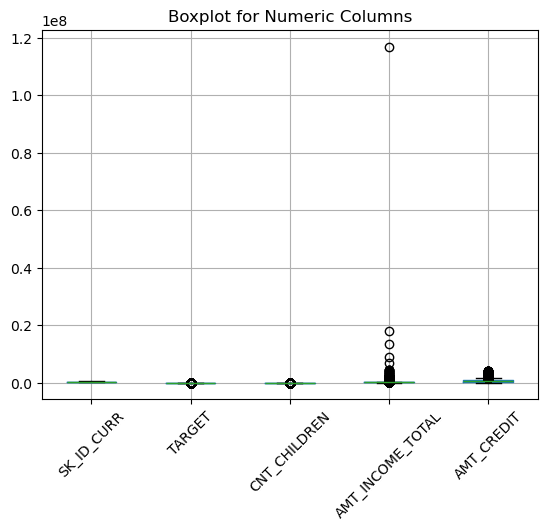

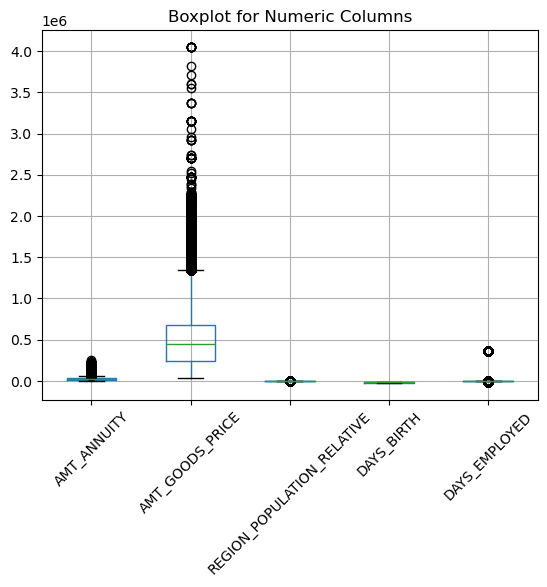

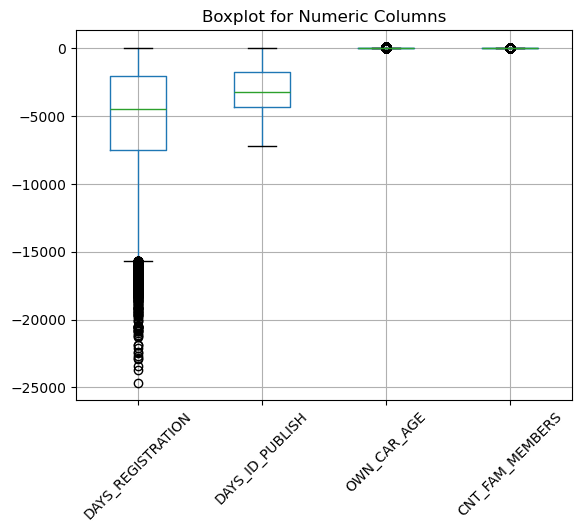

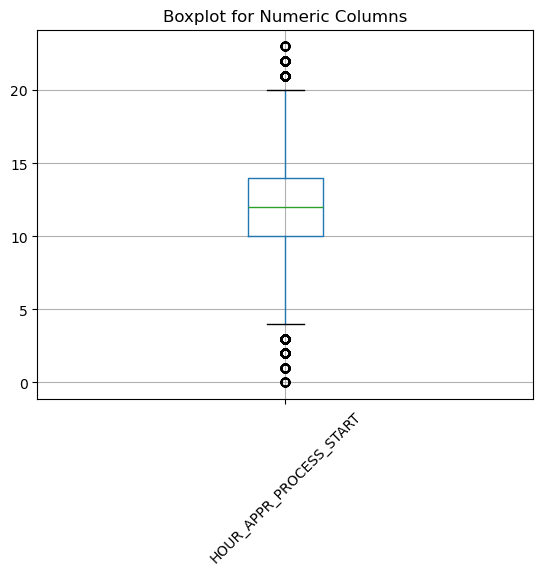

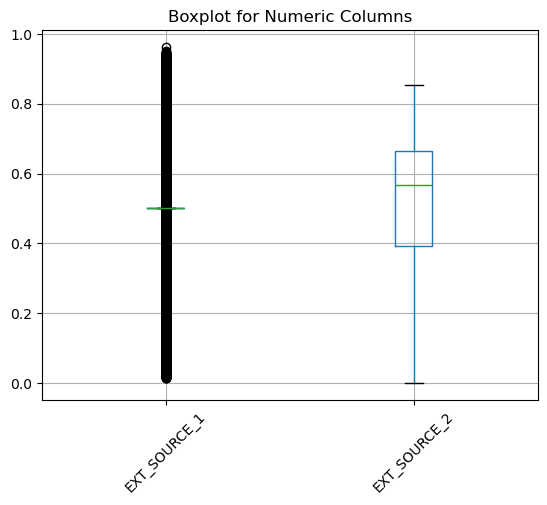

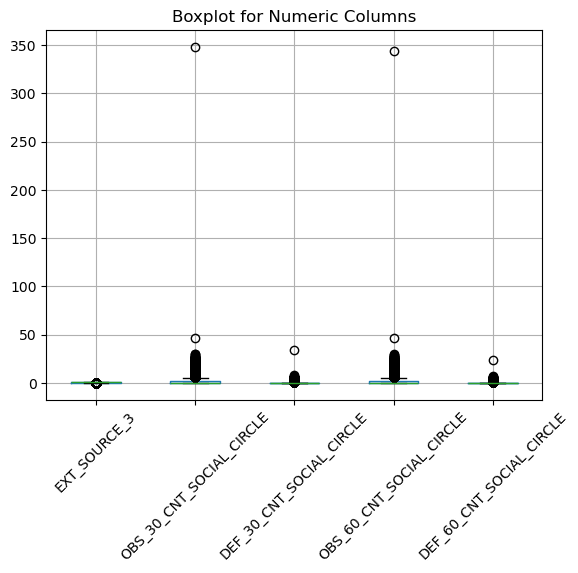

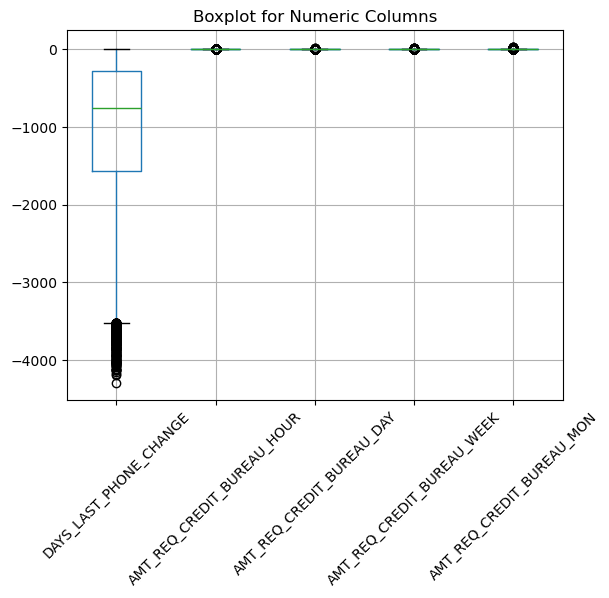

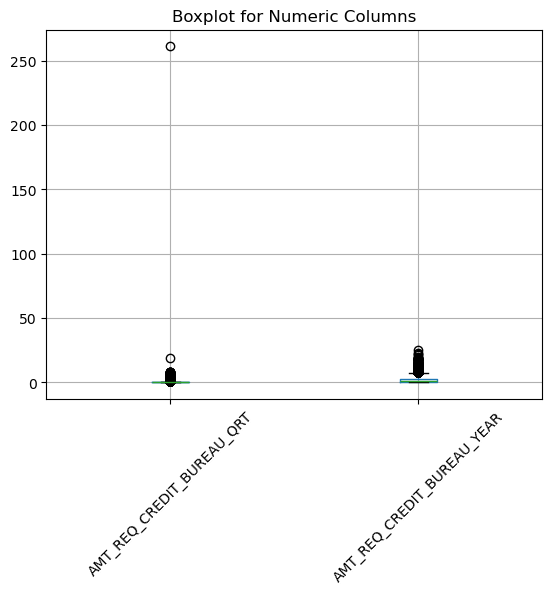

In [26]:
import matplotlib.pyplot as plt

# Memisahkan kolom numerik menjadi kelompok-kelompok lima
num_cols = cleaned_data[nums].columns
num_groups = [num_cols[i:i+5] for i in range(0, len(num_cols), 5)]

# Membuat boxplot untuk setiap kelompok
for group in num_groups:
    cleaned_data[group].boxplot()
    plt.title("Boxplot for Numeric Columns")
    plt.xticks(rotation=45)
    plt.show()

In [27]:
def remove_outliers_iqr(cleaned_data, col):
    # Calculate the IQR
    Q1 = cleaned_data[col].quantile(0.25)
    Q3 = cleaned_data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to exclude outliers
    filtered_dataframe = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]

    # Display information about the removed outliers
    outliers_removed = cleaned_data.shape[0] - filtered_dataframe.shape[0]
    print(f"Number of outliers removed in '{col}': {outliers_removed}")

    return filtered_dataframe

In [28]:
cols_to_check = ['AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_REGISTRATION', 
                 'AMT_REQ_CREDIT_BUREAU_YEAR', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE', 'EXT_SOURCE_1', 
                 'DAYS_EMPLOYED', 'DAYS_REGISTRATION']  

for col in cols_to_check:
    cleaned_data = remove_outliers_iqr(cleaned_data, col)


Number of outliers removed in 'AMT_INCOME_TOTAL': 13804
Number of outliers removed in 'AMT_GOODS_PRICE': 11577
Number of outliers removed in 'AMT_CREDIT': 371
Number of outliers removed in 'AMT_ANNUITY': 4998
Number of outliers removed in 'DAYS_REGISTRATION': 581
Number of outliers removed in 'AMT_REQ_CREDIT_BUREAU_YEAR': 3040
Number of outliers removed in 'REGION_POPULATION_RELATIVE': 5171
Number of outliers removed in 'OWN_CAR_AGE': 33373
Number of outliers removed in 'EXT_SOURCE_1': 99308
Number of outliers removed in 'DAYS_EMPLOYED': 0
Number of outliers removed in 'DAYS_REGISTRATION': 0


In [29]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132960 entries, 3 to 307509
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   132960 non-null  int64  
 1   TARGET                       132960 non-null  int64  
 2   NAME_CONTRACT_TYPE           132960 non-null  object 
 3   CODE_GENDER                  132960 non-null  object 
 4   FLAG_OWN_CAR                 132960 non-null  object 
 5   FLAG_OWN_REALTY              132960 non-null  object 
 6   CNT_CHILDREN                 132960 non-null  int64  
 7   AMT_INCOME_TOTAL             132960 non-null  float64
 8   AMT_CREDIT                   132960 non-null  float64
 9   AMT_ANNUITY                  132960 non-null  float64
 10  AMT_GOODS_PRICE              132960 non-null  float64
 11  NAME_TYPE_SUITE              132960 non-null  object 
 12  NAME_INCOME_TYPE             132960 non-null  object 
 13  NAME

## Feature Transformation

In [30]:
cleaned_data.shape

(132960, 53)

C:\Users\hanif\AppData\Local\Temp\ipykernel_11612\53775043.py:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(scaled_values.flatten(), bw_method=0.5)  # Adjust bandwidth as needed


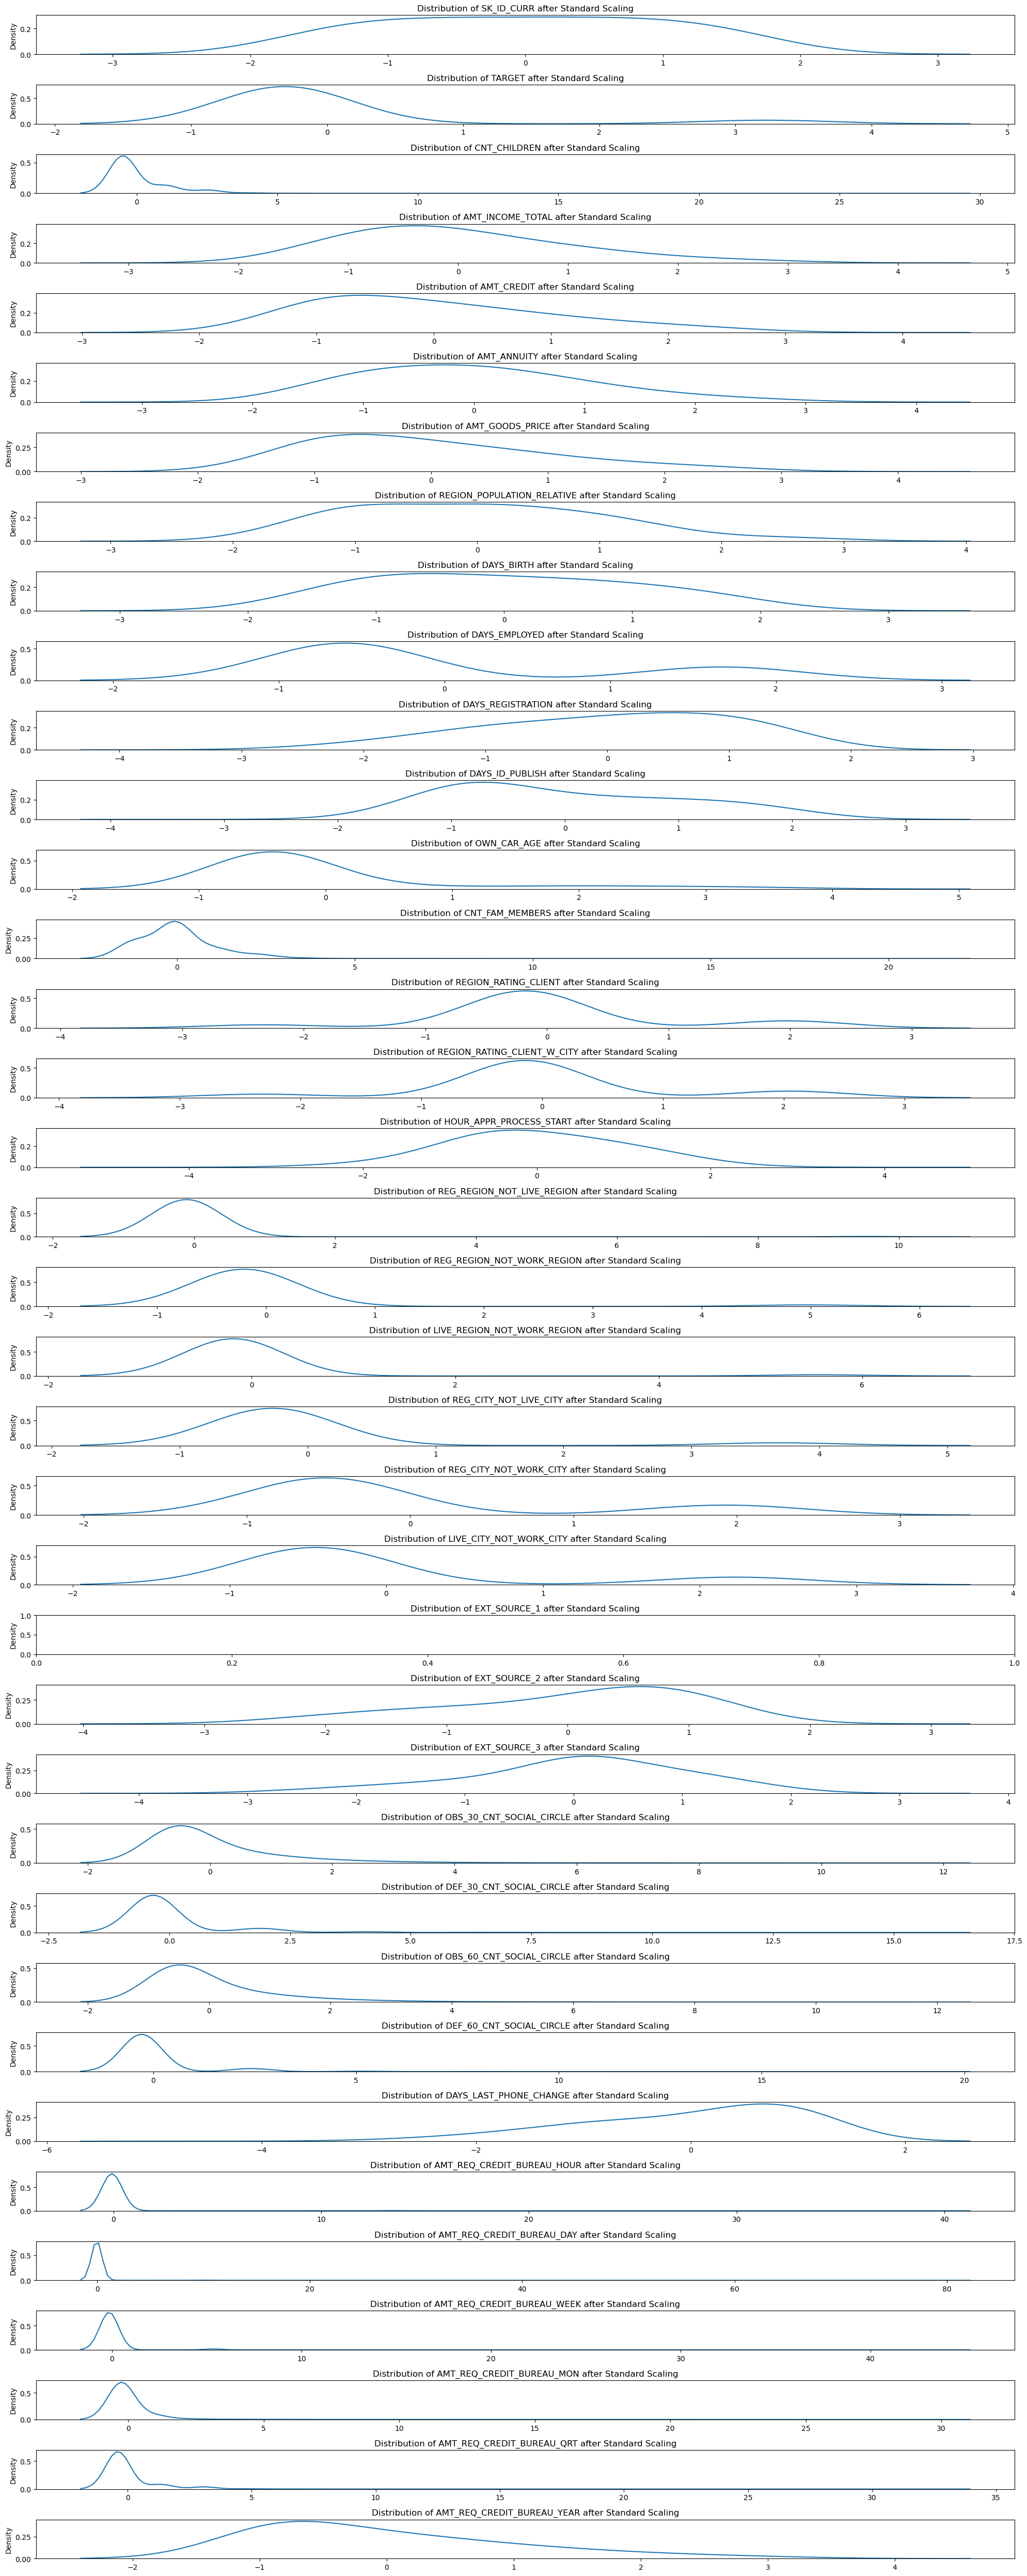

In [31]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Create subplots for each numeric feature
plt.figure(figsize=(20,50))
for i, col in enumerate(nums, start=1):
    # Reshape the 1D array to a 2D array
    feature_values = cleaned_data[col].values.reshape(-1, 1)

    # Fit and transform the feature values using StandardScaler
    scaled_values = scaler.fit_transform(feature_values)

    # Plot the KDE plot for the scaled values
    plt.subplot(len(nums), 1, i)
    sns.kdeplot(scaled_values.flatten(), bw_method=0.5)  # Adjust bandwidth as needed
    plt.title(f"Distribution of {col} after Standard Scaling")

plt.tight_layout()
plt.show()

## Feature Encodingg

In [37]:
cleaned_data[cats].info()

<class 'pandas.core.frame.DataFrame'>
Index: 132960 entries, 3 to 307509
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   NAME_CONTRACT_TYPE           132960 non-null  object
 1   CODE_GENDER                  132960 non-null  object
 2   FLAG_OWN_CAR                 132960 non-null  object
 3   FLAG_OWN_REALTY              132960 non-null  object
 4   NAME_TYPE_SUITE              132960 non-null  object
 5   NAME_INCOME_TYPE             132960 non-null  object
 6   NAME_EDUCATION_TYPE          132960 non-null  object
 7   NAME_FAMILY_STATUS           132960 non-null  object
 8   NAME_HOUSING_TYPE            132960 non-null  object
 9   FLAG_EMP_PHONE               132960 non-null  object
 10  FLAG_WORK_PHONE              132960 non-null  object
 11  FLAG_PHONE                   132960 non-null  object
 12  FLAG_EMAIL                   132960 non-null  object
 13  OCCUPATION_TYPE    

In [ ]:
'WEEKDAY_APPR_PROCESS_START'

In [48]:
mapping_Gender = {'M': 0, 'F': 1}
cleaned_data['Gender_Map'] = cleaned_data['CODE_GENDER'].map(mapping_Gender)

In [49]:
mapping_contract_type = {'Cash loans': 0, 'Revolving loans': 1}
cleaned_data['map_contract_type'] = cleaned_data['NAME_CONTRACT_TYPE'].map(mapping_contract_type)

In [50]:
mapping_flag_car = {'N': 0, 'Y': 1}
cleaned_data['map_flag_own_car'] = cleaned_data['FLAG_OWN_CAR'].map(mapping_flag_car)

In [51]:
mapping_flag_realty = {'N': 0, 'Y': 1}
cleaned_data['map_flag_own_realty'] = cleaned_data['FLAG_OWN_REALTY'].map(mapping_flag_realty)

In [57]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding untuk setiap kolom
for col in ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
            'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
            'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
            'ORGANIZATION_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']:
    cleaned_data[col] = label_encoder.fit_transform(cleaned_data[col])

    # Melakukan label encoding
    cleaned_data[col] = label_encoder.fit_transform(cleaned_data[col])

In [44]:
# Definisi dictionary untuk melakukan mapping
mapping = {
    'SUNDAY': 0,
    'MONDAY': 1,
    'TUESDAY': 1,
    'WEDNESDAY': 1,
    'THURSDAY': 1,
    'FRIDAY': 1,
    'SATURDAY': 0
}

# Lakukan label encoding menggunakan map
cleaned_data['WEEKDAY_APPR_PROCESS_START'] = cleaned_data['WEEKDAY_APPR_PROCESS_START'].map(mapping)

In [54]:
# Ambil lima jenis pekerjaan teratas
top_occupations = cleaned_data['OCCUPATION_TYPE'].value_counts().head(5).index.tolist()

# Label encoding
cleaned_data['OCCUPATION_TYPE'] = cleaned_data['OCCUPATION_TYPE'].apply(lambda x: x if x in top_occupations else 'Others')

# Mapping untuk label encoding
mapping = {occupation: i for i, occupation in enumerate(top_occupations, start=0)}
mapping['Others'] = 5

# Lakukan label encoding menggunakan map
cleaned_data['OCCUPATION_TYPE'] = cleaned_data['OCCUPATION_TYPE'].map(mapping)


In [56]:
# List nama kolom yang ingin dihapus
columns_to_drop = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
# Menghapus kolom dari DataFrame
cleaned_data = cleaned_data.drop(columns_to_drop, axis=1)

In [59]:
cleaned_data['REGION_RATING_CLIENT'] = cleaned_data['REGION_RATING_CLIENT'].astype(int)
cleaned_data['REGION_RATING_CLIENT_W_CITY'] = cleaned_data['REGION_RATING_CLIENT_W_CITY'].astype(int)

In [61]:
cleaned_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Gender_Map,map_contract_type,map_flag_own_car,map_flag_own_realty
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,6,6,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,6,6,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
5,100008,0,0,99000.0,490495.5,27517.5,454500.0,5,3,4,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0,1
9,100012,0,0,135000.0,405000.0,20250.0,405000.0,6,6,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
16,100020,0,0,108000.0,509602.5,26149.5,387000.0,6,6,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0


## Handle Class Imbalance

In [62]:
cleaned_data.TARGET.value_counts()

TARGET
0    121281
1     11679
Name: count, dtype: int64

In [63]:
X_train = cleaned_data.drop('TARGET', axis=1)
y_train = cleaned_data['TARGET']

In [66]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

In [68]:
cleaned_data = pd.concat([X_train, y_train], axis=1)
cleaned_data.TARGET.value_counts()

TARGET
0    121281
1    121281
Name: count, dtype: int64

### Save Result

In [69]:
cleaned_data['TARGET'] = cleaned_data.pop('TARGET')
cleaned_data.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Gender_Map,map_contract_type,map_flag_own_car,map_flag_own_realty,TARGET
0,100006,0,135000.0,312682.5,29686.5,297000.0,6,6,4,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
1,100007,0,121500.0,513000.0,21865.5,513000.0,6,6,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
2,100008,0,99000.0,490495.5,27517.5,454500.0,5,3,4,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0,0,1,0
3,100012,0,135000.0,405000.0,20250.0,405000.0,6,6,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
4,100020,0,108000.0,509602.5,26149.5,387000.0,6,6,4,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0


In [70]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242562 entries, 0 to 242561
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   242562 non-null  int64  
 1   CNT_CHILDREN                 242562 non-null  int64  
 2   AMT_INCOME_TOTAL             242562 non-null  float64
 3   AMT_CREDIT                   242562 non-null  float64
 4   AMT_ANNUITY                  242562 non-null  float64
 5   AMT_GOODS_PRICE              242562 non-null  float64
 6   NAME_TYPE_SUITE              242562 non-null  int64  
 7   NAME_INCOME_TYPE             242562 non-null  int64  
 8   NAME_EDUCATION_TYPE          242562 non-null  int64  
 9   NAME_FAMILY_STATUS           242562 non-null  int64  
 10  NAME_HOUSING_TYPE            242562 non-null  int64  
 11  REGION_POPULATION_RELATIVE   242562 non-null  float64
 12  DAYS_BIRTH                   242562 non-null  int64  
 13 

In [71]:
cleaned_data.to_csv('train.csv', index=False)

In [90]:
train = pd.read_csv('train.csv')
train.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Gender_Map,map_contract_type,map_flag_own_car,map_flag_own_realty,TARGET
0,100006,0,135000.0,312682.5,29686.5,297000.0,6,6,4,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
1,100007,0,121500.0,513000.0,21865.5,513000.0,6,6,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
2,100008,0,99000.0,490495.5,27517.5,454500.0,5,3,4,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0,0,1,0
3,100012,0,135000.0,405000.0,20250.0,405000.0,6,6,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
4,100020,0,108000.0,509602.5,26149.5,387000.0,6,6,4,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0


# Feature Selection

<Axes: >

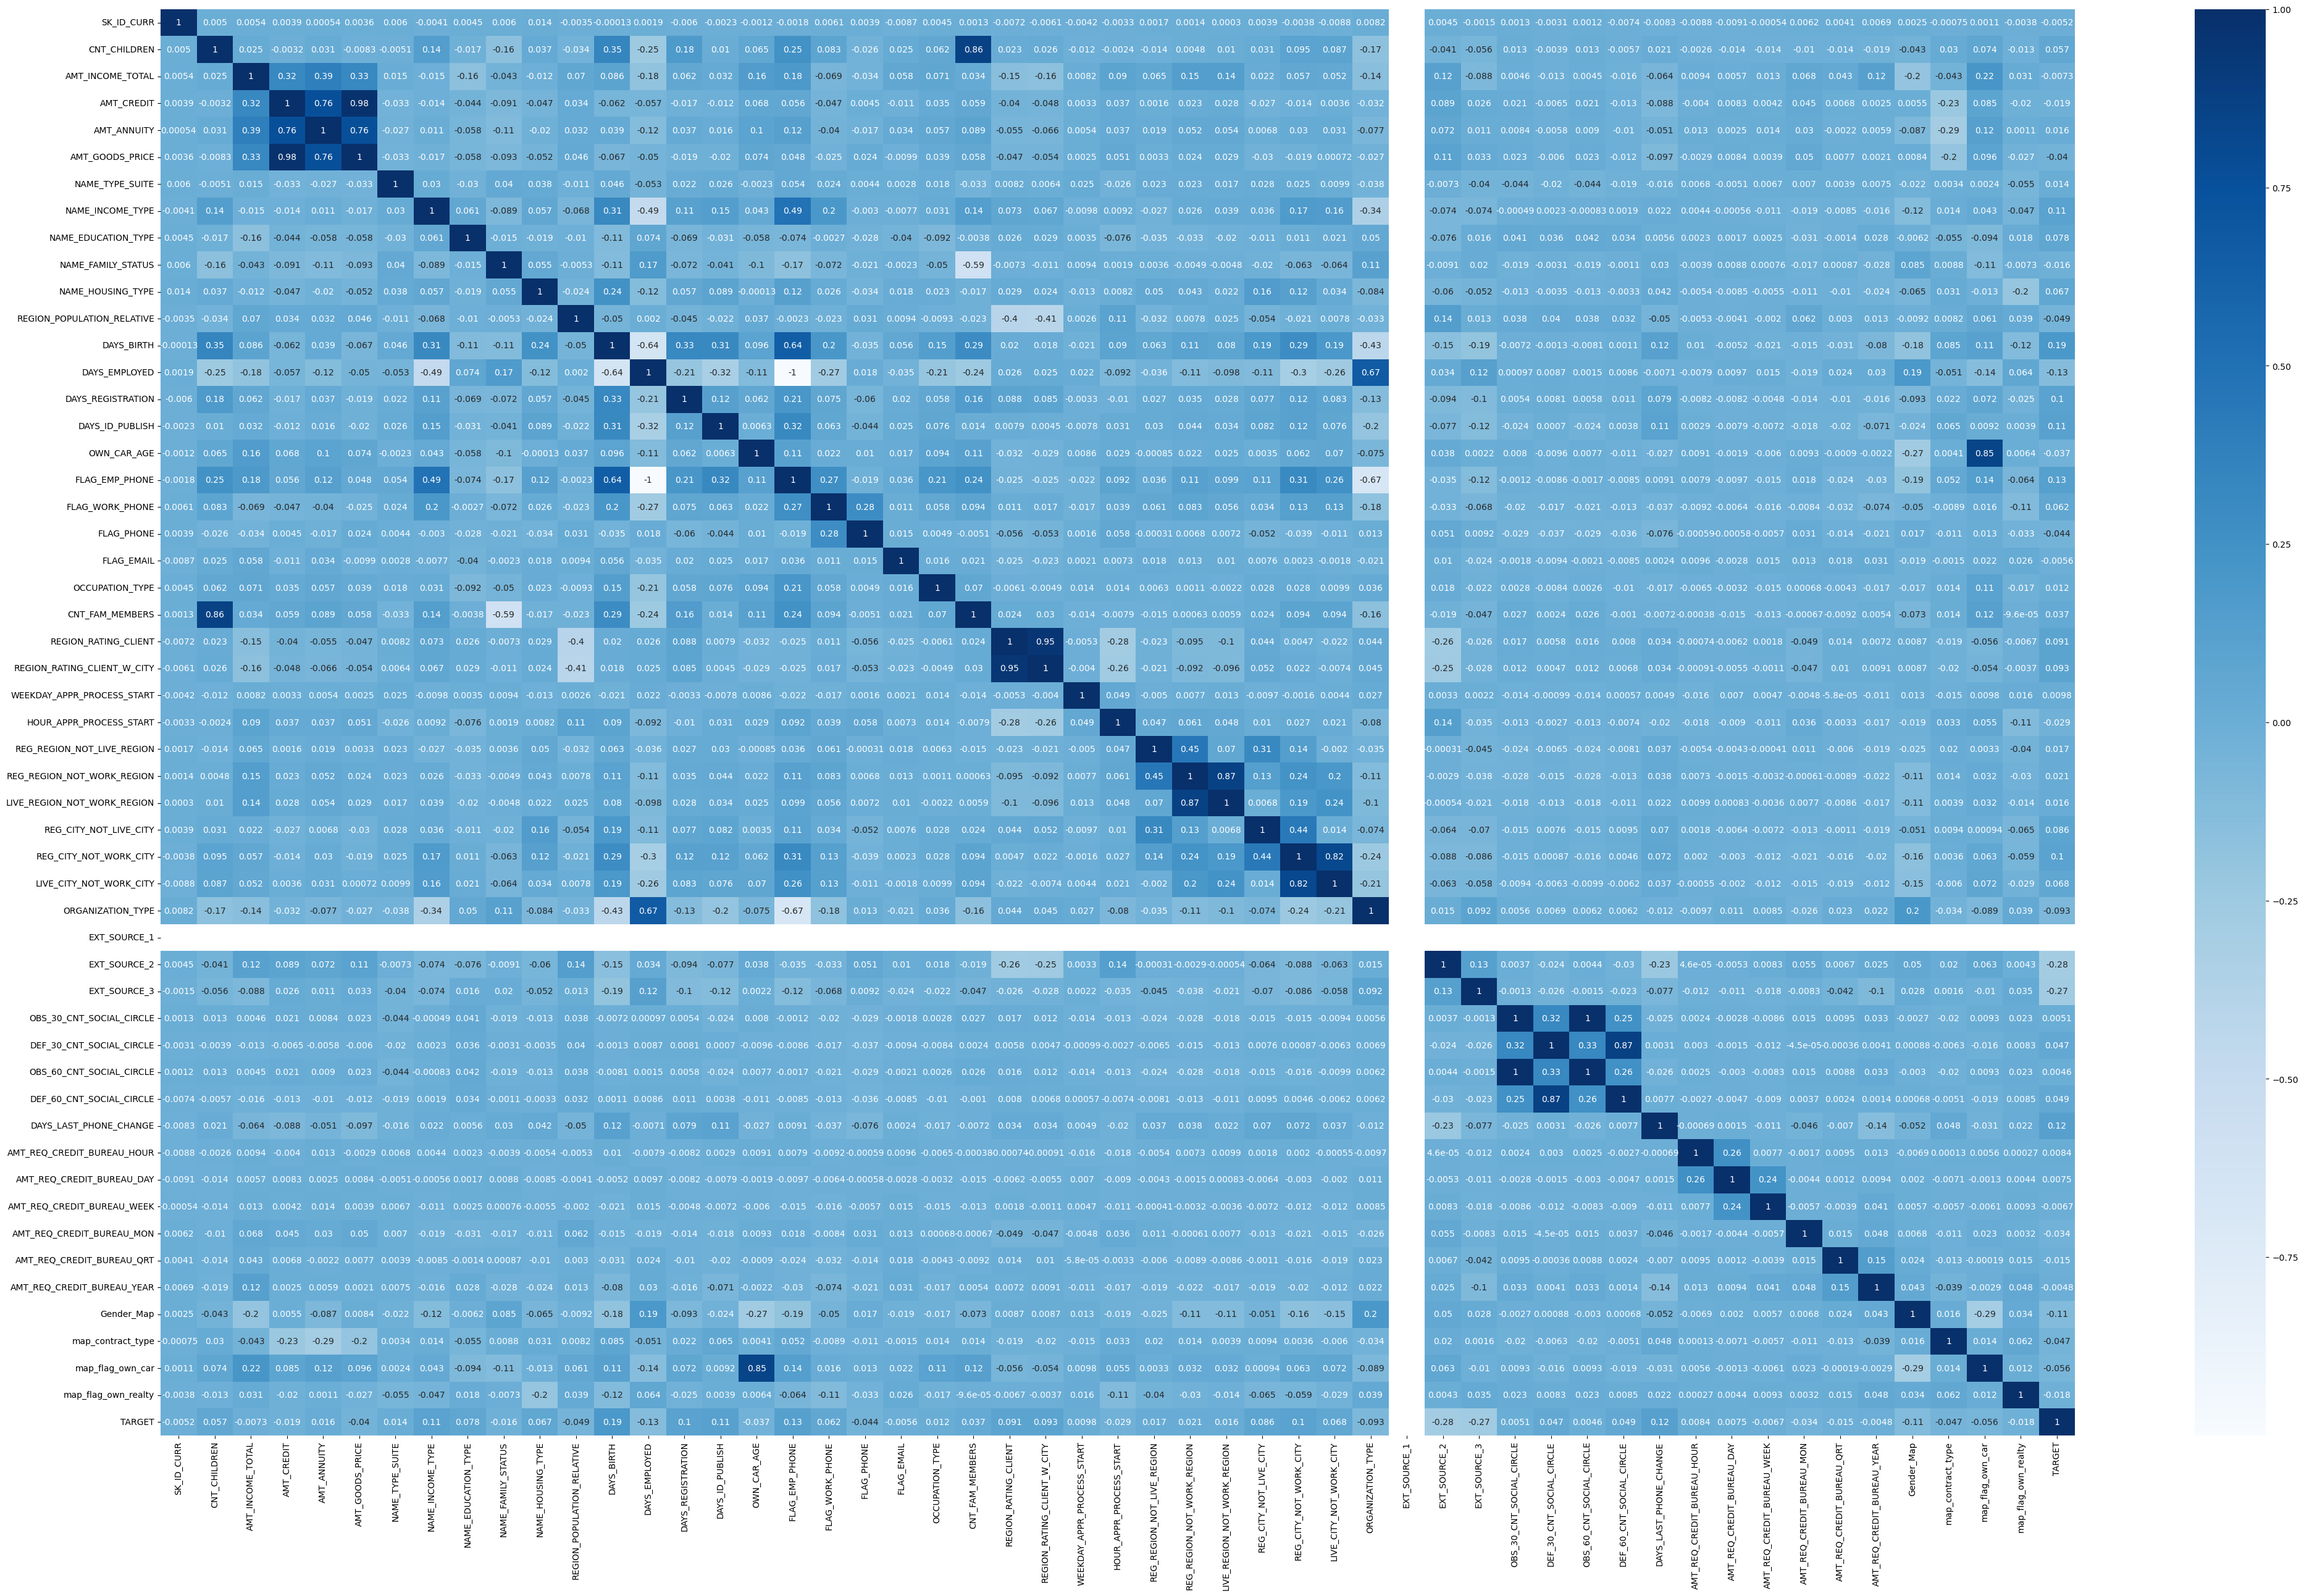

In [91]:
plt.figure(figsize=(50, 30))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

# drop column redundant (>60) dan column dengan corr rendah (<0.03)
- drop ('CNT_FAM_MEMBERS') karena redundant (0.86) dan < dari 'CNT_CHILDREN'
- drop 'AMT_CREDIT' & 'AMT_ANNUITY' karena redundant (0.76 & 0.98) dan < dari 'AMT_GOODS_PRICE'
- drop 'FLAG_EMP_PHONE' karena redundant (0.64) dan < 'DAYS_BIRTH'
- drop 'ORANIZATION_TYPE' karena redundant (0.67) dan < 'DAYS_EMPLOYED'
- drop 'OWN_CAR_AGE' karena redundant (0.85) dan < 'map_flag_own_car'
- drop 'REGION_RATING_CLIENT' karena redundant (0.95) dan < 'REGION_RATING_CLIENT_W_CITY'
- drop 'LIVE_REGION_NOT_WORK_REGION' karena redundant (0.87) dan < 'REG_REGION_NOT_WORK_REGION'
- drop 'LIVE_CITY_NOT_WORK_CITY' karena redundant (0.85) dan < 'REG_CITY_NOT_WORK_CITY'
- drop 'DEF_30_CNT_SOCIAL_CIRCLE' karena redundant (0.85) dan < 'DEF_60_CNT_SOCIAL_CIRCLE'
- drop 'SK_ID_CURR', 'AMT_INCOME_TOTAL', 'NAME_TYPE_SUITE', 'NAME_FAMILY_STATUS', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'map_flag_own_realty'

In [92]:
columns_to_drop = ['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'NAME_TYPE_SUITE', 'NAME_FAMILY_STATUS', 
                   'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 
                   'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
                   'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
                   'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
                   'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT', 
                   'AMT_REQ_CREDIT_BUREAU_YEAR', 'map_flag_own_realty', 'CNT_FAM_MEMBERS', 'AMT_CREDIT', 
                   'AMT_ANNUITY', 'FLAG_EMP_PHONE', 'ORGANIZATION_TYPE', 'OWN_CAR_AGE', 'REGION_RATING_CLIENT',
                  'LIVE_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY' ]

feature = train.drop(columns=columns_to_drop, axis=1)
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242562 entries, 0 to 242561
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CNT_CHILDREN                 242562 non-null  int64  
 1   AMT_GOODS_PRICE              242562 non-null  float64
 2   NAME_INCOME_TYPE             242562 non-null  int64  
 3   NAME_EDUCATION_TYPE          242562 non-null  int64  
 4   NAME_HOUSING_TYPE            242562 non-null  int64  
 5   REGION_POPULATION_RELATIVE   242562 non-null  float64
 6   DAYS_BIRTH                   242562 non-null  int64  
 7   DAYS_EMPLOYED                242562 non-null  int64  
 8   DAYS_REGISTRATION            242562 non-null  float64
 9   DAYS_ID_PUBLISH              242562 non-null  int64  
 10  FLAG_WORK_PHONE              242562 non-null  int64  
 11  FLAG_PHONE                   242562 non-null  int64  
 12  OCCUPATION_TYPE              242562 non-null  int64  
 13 

In [93]:
feature.head()

,CNT_CHILDREN,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,Gender_Map,map_contract_type,map_flag_own_car,TARGET
0,0,297000.0,6,4,1,0.008019,-19005,-3039,-9833.0,-2437,...,0.650442,0.535276,0.0,0.0,-617.0,0.0,1.0,0,0,0
1,0,513000.0,6,4,1,0.028663,-19932,-3038,-4311.0,-3458,...,0.322738,0.535276,0.0,0.0,-1106.0,0.0,0.0,0,0,0
2,0,454500.0,3,4,1,0.035792,-16941,-1588,-4970.0,-477,...,0.354225,0.621226,0.0,0.0,-2536.0,0.0,0.0,0,0,0
3,0,405000.0,6,4,1,0.019689,-14469,-2019,-14437.0,-3992,...,0.746644,0.535276,0.0,0.0,-1673.0,0.0,0.0,1,0,0
4,0,387000.0,6,4,1,0.018634,-12931,-1317,-6392.0,-3866,...,0.236378,0.062103,0.0,0.0,-3.0,0.0,0.0,0,0,0


In [95]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Membuat objek imputer dengan strategi mean
imputer = SimpleImputer(strategy='mean')

# Mengisi nilai yang hilang dalam data
imputed_data = imputer.fit_transform(X_train)

# Melakukan seleksi fitur menggunakan mutual information
k_best_features = SelectKBest(mutual_info_classif, k=10).fit(imputed_data, y_train)

# Mengambil fitur-fitur terbaik
selected_features = X_train.columns[k_best_features.get_support()]


In [103]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_regression

# Mengisi missing values dengan mean
imputer = SimpleImputer(strategy='mean')
train_imputed = imputer.fit_transform(feature)

# Hitung mutual information antara setiap fitur dan target
mutual_info_values = mutual_info_regression(train_imputed, train_imputed[:, -1])

print("\nMutual Information:")
for column, mi in zip(feature.columns, mutual_info_values):
    print(f"{column}: {mi}")



Mutual Information:
CNT_CHILDREN: 0.002003899172255963
AMT_GOODS_PRICE: 0.016508322606815895
NAME_INCOME_TYPE: 0.009427244993275075
NAME_EDUCATION_TYPE: 0.0035435556147662695
NAME_HOUSING_TYPE: 0.0029918153777304113
REGION_POPULATION_RELATIVE: 0.010679707010341488
DAYS_BIRTH: 0.23827655945354032
DAYS_EMPLOYED: 0.11712342911548212
DAYS_REGISTRATION: 0.19045576819241106
DAYS_ID_PUBLISH: 0.08477839606336346
FLAG_WORK_PHONE: 0.0051488105636909864
FLAG_PHONE: 0.0028189280141805995
OCCUPATION_TYPE: 0.01106576521335878
REGION_RATING_CLIENT_W_CITY: 0.003305754413792883
REG_CITY_NOT_LIVE_CITY: 0.004833494363308155
REG_CITY_NOT_WORK_CITY: 0.006490729107747839
EXT_SOURCE_1: 0.0
EXT_SOURCE_2: 0.4293051729137769
EXT_SOURCE_3: 0.050293521704924515
DEF_30_CNT_SOCIAL_CIRCLE: 0.0020307474113980817
DEF_60_CNT_SOCIAL_CIRCLE: 0.005392027372413288
DAYS_LAST_PHONE_CHANGE: 0.05427705933418103
AMT_REQ_CREDIT_BUREAU_MON: 0.0
Gender_Map: 0.005830455693517145
map_contract_type: 0.002060479272977034
map_flag_own

In [104]:
from sklearn.preprocessing import LabelEncoder
for col in feature.columns:
    le = LabelEncoder()
    feature[col] = le.fit_transform(feature[col])
feature.head()

,CNT_CHILDREN,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,Gender_Map,map_contract_type,map_flag_own_car,TARGET
0,0,103,6,4,1,33,6092,7949,4924,3520,...,59309,533,0,0,2903,0,1,0,0,0
1,0,237,6,4,1,73,5165,7950,10445,2499,...,20000,533,0,0,2414,0,0,0,0,0
2,0,199,3,4,1,77,8155,9400,9786,5480,...,22660,582,0,0,984,0,0,0,0,0
3,0,170,6,4,1,65,10620,8969,617,1965,...,74569,533,0,0,1847,0,0,1,0,0
4,0,158,6,4,1,61,12157,9671,8364,2091,...,13447,137,0,0,3517,0,0,0,0,0


In [106]:
# Mutual Information dengan feature encoding

mutual_info_values = mutual_info_classif(feature, train['TARGET'])
print("\nMutual Information:")
for column, mi in zip(feature.columns, mutual_info_values):
    print(f"{column}: {mi}")



Mutual Information:
CNT_CHILDREN: 0.004078362522494494
AMT_GOODS_PRICE: 0.017360799861483978
NAME_INCOME_TYPE: 0.024857107461262018
NAME_EDUCATION_TYPE: 0.01956779710091605
NAME_HOUSING_TYPE: 0.02313288633871724
REGION_POPULATION_RELATIVE: 0.009389467391345496
DAYS_BIRTH: 0.2371344004820668
DAYS_EMPLOYED: 0.11604688175292166
DAYS_REGISTRATION: 0.18813854104448358
DAYS_ID_PUBLISH: 0.08394445576266074
FLAG_WORK_PHONE: 0.005029777209879294
FLAG_PHONE: 0.0049045654356132395
OCCUPATION_TYPE: 0.016248795880245526
REGION_RATING_CLIENT_W_CITY: 0.02424332858204492
REG_CITY_NOT_LIVE_CITY: 0.005018985549160915
REG_CITY_NOT_WORK_CITY: 0.011013117271350126
EXT_SOURCE_1: 0.0
EXT_SOURCE_2: 0.4267557015583576
EXT_SOURCE_3: 0.05291125888400838
DEF_30_CNT_SOCIAL_CIRCLE: 0.0018970670120792565
DEF_60_CNT_SOCIAL_CIRCLE: 0.0024720432801954573
DAYS_LAST_PHONE_CHANGE: 0.05546744804233472
AMT_REQ_CREDIT_BUREAU_MON: 0.0035058626919115543
Gender_Map: 0.03105800592076302
map_contract_type: 0.0016378025677472596


In [108]:
kolom_yang_dihapus = ['CNT_CHILDREN', 'AMT_GOODS_PRICE', 'NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE','FLAG_WORK_PHONE','FLAG_PHONE','OCCUPATION_TYPE','REG_CITY_NOT_LIVE_CITY',
                      'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_MON',
                     'map_contract_type', 'map_flag_own_car']
# Menghilangkan kolom yang tidak dibutuhkan
train_after_selection = feature.drop(kolom_yang_dihapus, axis=1)

train_after_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242562 entries, 0 to 242561
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   NAME_INCOME_TYPE             242562 non-null  int64
 1   NAME_HOUSING_TYPE            242562 non-null  int64
 2   DAYS_BIRTH                   242562 non-null  int64
 3   DAYS_EMPLOYED                242562 non-null  int64
 4   DAYS_REGISTRATION            242562 non-null  int64
 5   DAYS_ID_PUBLISH              242562 non-null  int64
 6   REGION_RATING_CLIENT_W_CITY  242562 non-null  int64
 7   EXT_SOURCE_2                 242562 non-null  int64
 8   EXT_SOURCE_3                 242562 non-null  int64
 9   DAYS_LAST_PHONE_CHANGE       242562 non-null  int64
 10  Gender_Map                   242562 non-null  int64
 11  TARGET                       242562 non-null  int64
dtypes: int64(12)
memory usage: 22.2 MB


In [109]:
train_after_selection.to_csv('train_fs.csv', index=False)

In [78]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Mengisi nilai yang hilang
imputer = SimpleImputer(strategy='mean')
cleaned_data_imputed = imputer.fit_transform(cleaned_data)

# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data_imputed)

# Inisialisasi model PCA dengan jumlah komponen yang diinginkan
n_components = 10  # Misalnya, ingin menggunakan 10 komponen
pca = PCA(n_components=n_components)

# Melatih model PCA dan mentransformasi data
pca.fit(scaled_data)
transformed_data = pca.transform(scaled_data)

# Memilih fitur-fitur yang paling penting
most_important_features = pca.components_


In [80]:
print("Komponen Utama:\n", pca.components_)
print("Proporsi Varians yang Dijelaskan:\n", pca.explained_variance_ratio_)

Komponen Utama:
 [[-1.41022264e-03  1.89606247e-01  1.21723792e-01  5.58579138e-02
   9.74874139e-02  5.36533385e-02  2.70253664e-02  2.26355873e-01
  -4.52430858e-02 -1.28674941e-01  8.77629789e-02 -8.38661419e-03
   3.37285322e-01 -3.90156603e-01  1.53684777e-01  1.59554199e-01
   1.16202417e-01  3.90908365e-01  1.43741344e-01 -8.50773382e-03
   2.51436536e-02  8.88562062e-02  2.00092498e-01 -1.13406598e-02
  -9.89712600e-03 -9.83247339e-03  5.36538841e-02  6.15774893e-02
   1.29877773e-01  1.14817096e-01  1.09862538e-01  2.38279962e-01
   2.02553996e-01 -3.00314026e-01  0.00000000e+00 -4.75724165e-02
  -9.86616598e-02 -7.28636811e-03 -6.72778449e-03 -7.64307465e-03
  -6.33753138e-03  3.43580949e-02  4.23352288e-03 -6.72729027e-03
  -1.13560105e-02  3.34100518e-03 -1.68806152e-02 -2.57284545e-02
  -1.55016081e-01  1.35989625e-02  1.27235182e-01 -5.26729280e-02
   9.95047943e-02]
 [ 3.78247683e-03 -4.12879542e-02  2.85186928e-01  4.30361823e-01
   4.00392385e-01  4.35171880e-01 -2.963

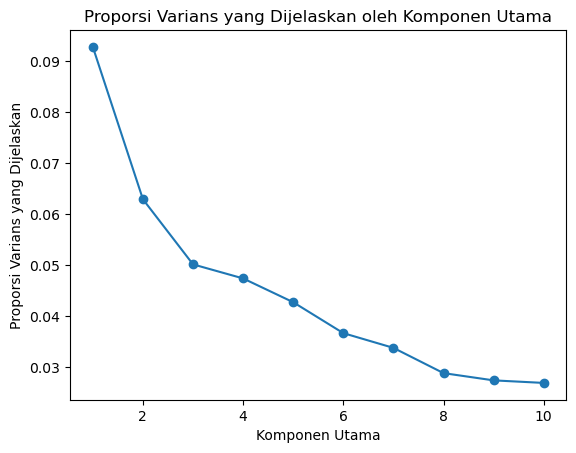

In [81]:
import matplotlib.pyplot as plt

# Plot proporsi varians yang dijelaskan
plt.plot(range(1, n_components+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Komponen Utama')
plt.ylabel('Proporsi Varians yang Dijelaskan')
plt.title('Proporsi Varians yang Dijelaskan oleh Komponen Utama')
plt.show()
